In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns

2024-07-30 13:52:51.127587: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 13:52:51.127819: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 13:52:51.266609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# Load the dataset
file_path = "/kaggle/input/depression-analysis-dataset/depression analysis dataset.xlsx"
data = pd.read_excel(file_path)

In [3]:

# Display the first few rows of the dataset
print(data.head())

                Timestamp  Age       Gender    Year of Study  \
0 2024-07-02 10:03:28.260   30       Female              Phd   
1 2024-07-02 10:05:33.085   90  Transgender              NaN   
2 2024-07-02 19:45:46.686  NaN          NaN              NaN   
3 2024-07-02 20:40:17.326   20       Female  B. Com graduate   
4 2024-07-02 20:59:05.632   23       Female             2023   

     Field of Study  Field of Study.1 Living Situation  \
0    Bioinformatics               NaN             Good   
1               NaN               NaN              NaN   
2               NaN               NaN              NaN   
3          Commerce               NaN             Good   
4  English honours                NaN        All good    

  Part-time/Full-time Student 1.Little interest or pleasure in doing things.  \
0                   Full time                                   Several days   
1                         NaN                                            NaN   
2                         

In [4]:
# Check the data types of each column
print(data.dtypes)

Timestamp                                                                           datetime64[ns]
Age                                                                                         object
Gender                                                                                      object
Year of Study                                                                               object
Field of Study                                                                              object
                                                                                         ...      
  5. Do you have diabetes?                                                                  object
  6. Do you have heart disease?                                                             object
7. Do you have digestive issue                                                              object
3. How often do you use the following coping mechanisms? (Select all that apply)            object
Score     

In [5]:
data_cleaned = data.iloc[3:]

In [6]:
# Identify the column name for column 10
column_name = data_cleaned.columns[10]

# Map responses to the specified classes
class_mapping = {
    'Not at all (0)': 1,  # No depression
    'Several days (1)': 3,  # Moderate (Several days)
    'More than half the days (2)': 2,  # Mild depression (Half of the day)
    'Nearly every day (3)': 4  # Severe (Everyday)
}

# Create a new column for class labels
data_cleaned['Class'] = data_cleaned[column_name].map(class_mapping)


/tmp/ipykernel_33/705734571.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Class'] = data_cleaned[column_name].map(class_mapping)


In [7]:
# Select relevant features (excluding Timestamp, Email Address, and other non-numeric columns)
features = data_cleaned.drop(columns=['Timestamp', 'Email Address', 'Class', column_name])

In [8]:
# Handle missing values by filling them with the mode of each column
for column in features.columns:
    if features[column].isnull().any():
        mode_value = features[column].mode()
        if not mode_value.empty:
            features[column].fillna(mode_value[0], inplace=True)
        else:
            features[column].fillna(0, inplace=True)  # Fill with 0 if mode is not available


/tmp/ipykernel_33/210241116.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  features[column].fillna(mode_value[0], inplace=True)
/tmp/ipykernel_33/210241116.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [15]:
# Handle missing values: Fill numerical columns with median, categorical columns with mode
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns

In [16]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = features.select_dtypes(include=['object']).columns
features[categorical_cols] = features[categorical_cols].astype(str)


In [17]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    features[col] = LabelEncoder().fit_transform(features[col])

In [18]:
# Extract the target variable
target = data_cleaned['Class']

<Figure size 1600x1200 with 0 Axes>

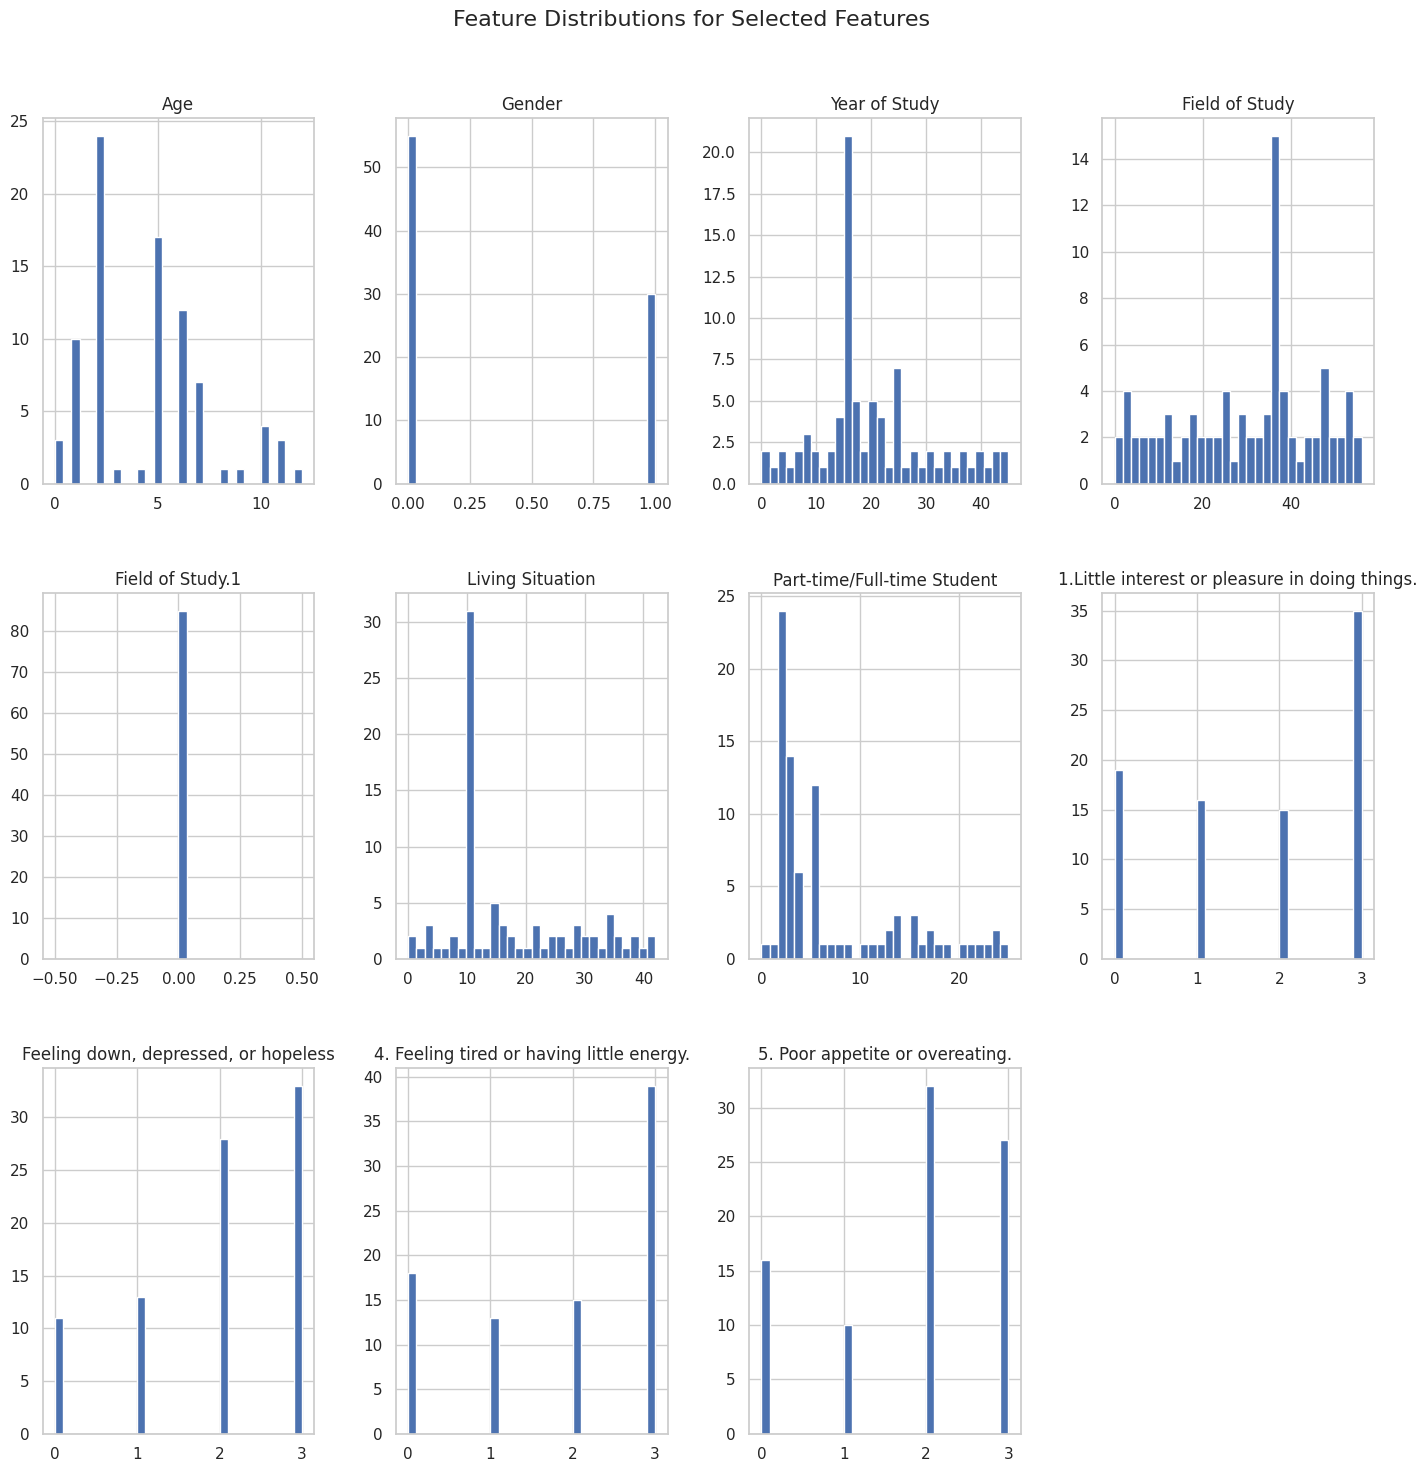

In [38]:
import matplotlib.pyplot as plt

# Select the 7 features you want to visualize
selected_features = features[features.columns[:11]]  # Adjust based on the actual features you want to select

num_features = len(selected_features.columns)
num_cols = 4  # Number of columns in the subplot grid
num_rows = (num_features + num_cols - 1) // num_cols  # Calculate the number of rows needed

plt.figure(figsize=(16, 12))
selected_features.hist(bins=30, figsize=(14, 15), layout=(num_rows, num_cols))
plt.suptitle('Feature Distributions for Selected Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust spacing
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust spacing between plots
plt.show()


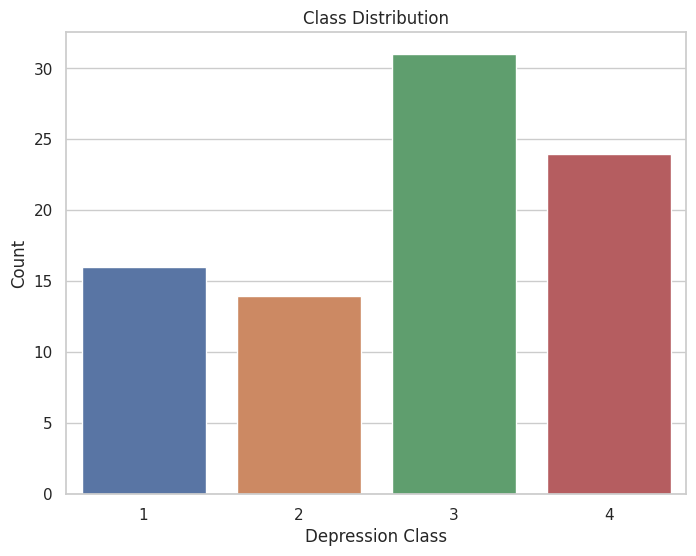

In [39]:
##### import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualizations
sns.set(style="whitegrid")

# Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target)
plt.title('Class Distribution')
plt.xlabel('Depression Class')
plt.ylabel('Count')
plt.show()



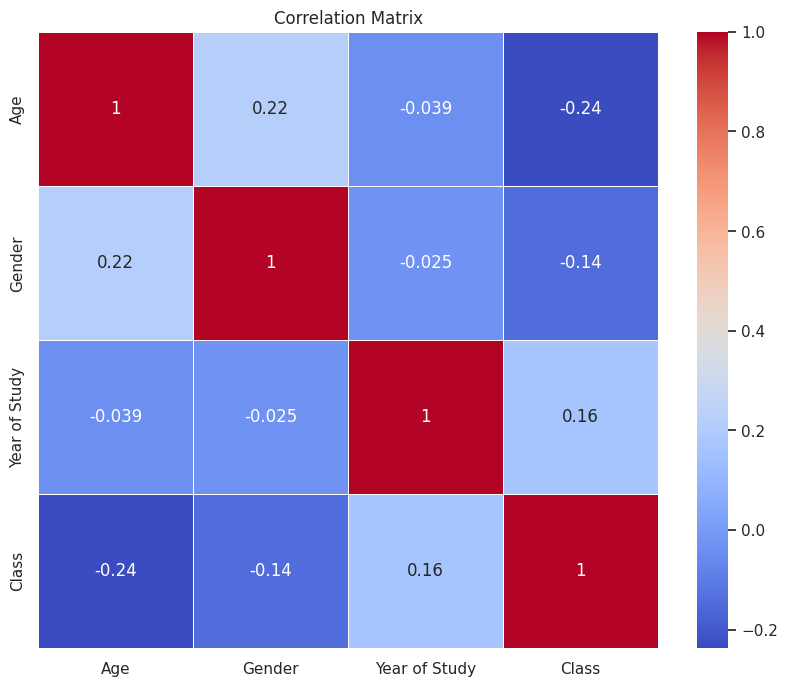

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'features' and 'target' are already defined
subset_features = features[['Age', 'Gender', 'Year of Study']].copy()
subset_features.loc[:, 'Class'] = target

# Calculate correlation matrix for subset_features
correlation_matrix = subset_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [41]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Print the shapes of X_train and X_test
print("Shape of X_train:", X_train_scaled.shape)
print("Shape of X_test:", X_test_scaled.shape)


Shape of X_train: (68, 66)
Shape of X_test: (17, 66)


In [71]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# Convert class labels to categorical (one-hot encoding)
y_train_categorical = to_categorical(y_train - 1, num_classes=4)  # Subtract 1 to start classes from 0
y_test_categorical = to_categorical(y_test - 1, num_classes=4)  # Subtract 1 to start classes from 0

# Define the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train_categorical, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_categorical)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 280ms/step - accuracy: 0.1424 - loss: 2.4616 - val_accuracy: 0.1429 - val_loss: 1.4758
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.2998 - loss: 1.9979 - val_accuracy: 0.2143 - val_loss: 1.4592
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3036 - loss: 1.8699 - val_accuracy: 0.2143 - val_loss: 1.4478
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2685 - loss: 1.9519 - val_accuracy: 0.2143 - val_loss: 1.4365
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3492 - loss: 2.1879 - val_accuracy: 0.2143 - val_loss: 1.4238
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7059 - loss: 1.2075
Test Accuracy: 0.7059


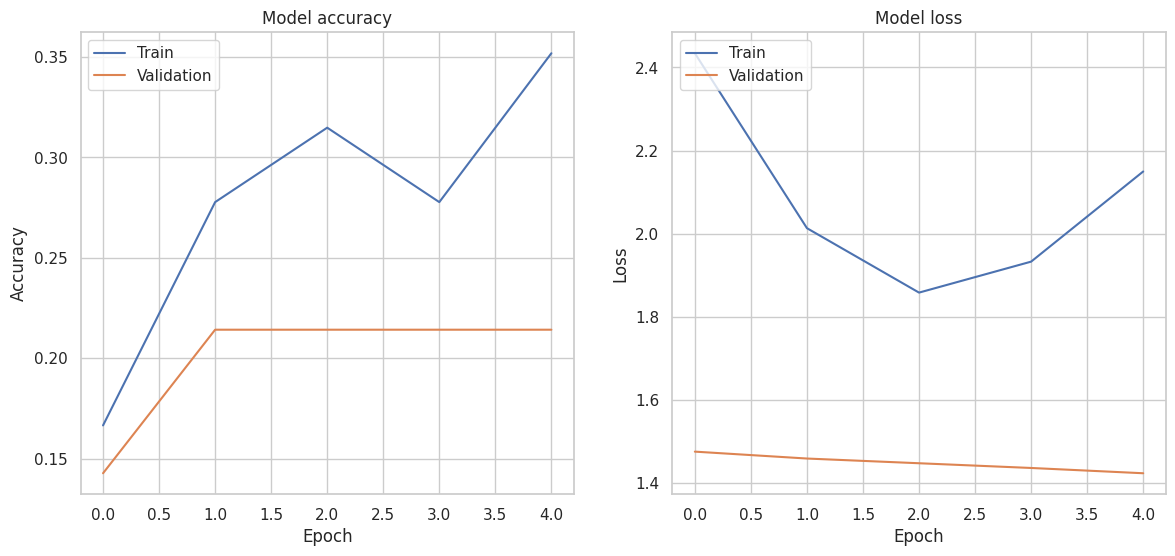

In [72]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


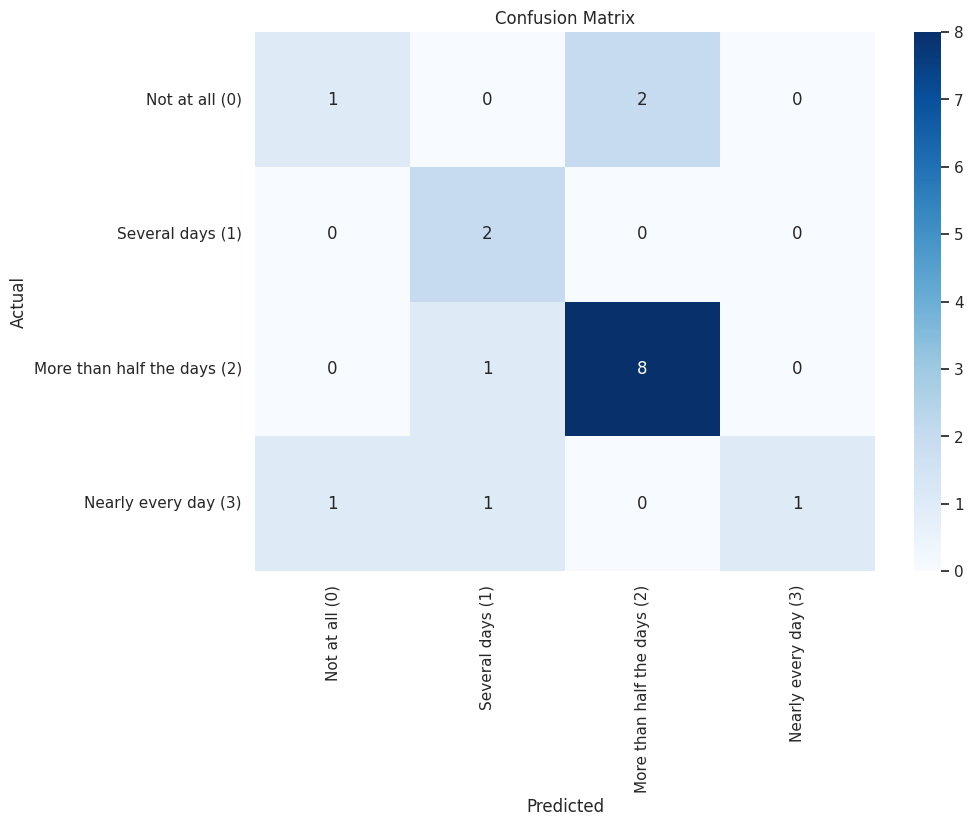

              precision    recall  f1-score   support

           1       0.50      0.33      0.40         3
           2       0.50      1.00      0.67         2
           3       0.80      0.89      0.84         9
           4       1.00      0.33      0.50         3

    accuracy                           0.71        17
   macro avg       0.70      0.64      0.60        17
weighted avg       0.75      0.71      0.68        17



In [73]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you already have predictions `y_pred_classes` and true labels `y_test`

y_pred = model.predict(X_test_scaled)
y_pred_classes = y_pred.argmax(axis=1) + 1  # Add 1 to match the original class labels

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Display confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print(classification_report(y_test, y_pred_classes))
